In [14]:
import pandas as pd
import time
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import html5lib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import interact, interactive, fixed
import pysal as py
from IPython.display import IFrame, Image, display
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('snowninja_b', 'saints71')
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
# Read in the data

In [15]:
tsavo = pd.read_csv('files/Tsavo Lion Study.csv')
tsavo.head()

,event-id,visible,timestamp,location-long,location-lat,comments,eobs:temperature,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1715414,True,2005-01-12 00:00:41.000,38.923761,-3.839644,30.0,NaN,gps,Panthera leo,#1940316,Diana,Tsavo Lion Study
1,1715415,True,2005-01-12 06:00:48.000,38.924986,-3.835012,34.0,NaN,gps,Panthera leo,#1940316,Diana,Tsavo Lion Study
2,1715416,True,2005-01-12 18:01:24.000,38.931286,-3.828839,31.0,NaN,gps,Panthera leo,#1940316,Diana,Tsavo Lion Study
3,1715417,True,2005-02-12 00:00:42.000,38.932911,-3.875628,31.0,NaN,gps,Panthera leo,#1940316,Diana,Tsavo Lion Study
4,1715418,True,2005-02-12 06:03:02.000,38.955816,-3.866109,34.0,NaN,gps,Panthera leo,#1940316,Diana,Tsavo Lion Study


In [ ]:
# Tidy the data

In [16]:
tsavo_tidy = pd.melt(tsavo, id_vars=["location-long", "location-lat", "individual-local-identifier", "timestamp"])
tsavo_tidy.head()

,location-long,location-lat,individual-local-identifier,timestamp,variable,value
0,38.923761,-3.839644,Diana,2005-01-12 00:00:41.000,event-id,1715414
1,38.924986,-3.835012,Diana,2005-01-12 06:00:48.000,event-id,1715415
2,38.931286,-3.828839,Diana,2005-01-12 18:01:24.000,event-id,1715416
3,38.932911,-3.875628,Diana,2005-02-12 00:00:42.000,event-id,1715417
4,38.955816,-3.866109,Diana,2005-02-12 06:03:02.000,event-id,1715418


In [ ]:
# Drop superfluous columns

In [17]:
tsavo_tidy.drop('variable', axis=1, inplace=True)

In [18]:
tsavo_tidy.drop('value', axis=1, inplace=True)

In [19]:
tsavo_tidy.head()

,location-long,location-lat,individual-local-identifier,timestamp
0,38.923761,-3.839644,Diana,2005-01-12 00:00:41.000
1,38.924986,-3.835012,Diana,2005-01-12 06:00:48.000
2,38.931286,-3.828839,Diana,2005-01-12 18:01:24.000
3,38.932911,-3.875628,Diana,2005-02-12 00:00:42.000
4,38.955816,-3.866109,Diana,2005-02-12 06:03:02.000


In [ ]:
# Run groupby plot to see results

individual-local-identifier
Diana      Axes(0.125,0.125;0.775x0.775)
Kiboche    Axes(0.125,0.125;0.775x0.775)
Romeo      Axes(0.125,0.125;0.775x0.775)
dtype: object

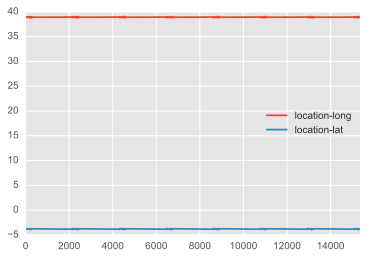

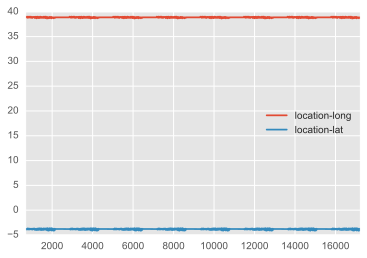

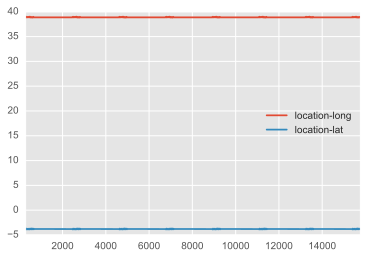

In [20]:
tsavo_tidy.groupby('individual-local-identifier').plot()

In [ ]:
# Attempt to read in HTML file of space time cube created from Plotly. html5lib was installed.

In [21]:
tsavo_stc = pd.read_html('files/index.html', header = 0)

ImportError: html5lib not found, please install it

In [ ]:
# The data was obtained from Movebank.org. The data was a movement study incorporating 3 lions that were tracked by GPS
# over a span of time from 2002-04-27 22:04:00.000 - 2007-07-21 00:01:58.000. The study area was outside of national parks,
# northwest of Mombassa, Kenya. The original study was to track lion movement in an area with other wildlife and cattle.
# The Tsavo region is famous for an event involving two lions who killed an undetermined number of railway workers constructing
# a bridge in 1898, which was a project led by Lieutenant-Colonel John Henry Patterson, a military engineer from the U.K. 
# Col. Patterson recorded the events in his book "The Man-Eaters of Tsavo."
# The goal of this project was to map the range of the three lions in the study. Complications arised when attempting to create
# 2-D maps of the latitude and longitude data due to "Basemap" package not being compatible with Python 3.5 for Windows.
# Further complications arised from trying to include html rendered space time cube plotting longitude and latitude on X and Y
# and time stamps on Z axis. Data showed that two study subjects, Diana and Romeo, had a narrower and similar range, while
# study subject Kiboche had a much larger range, but also a significantly higher number of deployed locations recorded.
# Regular plotting methods of data were inconclusive beyond establishing that there were points of longitude and latitude in
# the data. Further study of data would include overcoming complications mentioned. 
